<a href="https://colab.research.google.com/github/dtolpin/bgu-macs-colab/blob/main/logexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logarithm and exponent

Applications of $log$ and $exp$ in computer science.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy

## Problem: Counting subsets of given size

We are given a set of $N$ elements (e.g. items for sale in a store). We need to estimate number of subsets of size $K$, $0 \le K \le N$. 

Mathematically, the answer is given by the 'binomial coefficient' $N \choose K$,

$${N \choose K} = \frac {N!} {K!(N-K)!}$$

We can write a program for computing the factorial, and then call it three times to compute the result.

In [ ]:
def fact(n):
  fct = 1
  for i in range(n):
    fct *= i+1
  return fct

def comb(n, k):
  return fact(n)//(fact(k)*fact(n - k))

In [ ]:

%time print("1 out of 1 = %d" % comb(1, 1))
%time print("3 out of 4  = %d" % comb(4, 3))
%time print("10 out of 100000 = %d" % comb(100000, 10))

1 out of 1 = 1
CPU times: user 291 µs, sys: 8 µs, total: 299 µs
Wall time: 229 µs
3 out of 4  = 4
CPU times: user 132 µs, sys: 0 ns, total: 132 µs
Wall time: 90.4 µs
99990 out of 100000 = 27544920827561470257469913571105409574990000
CPU times: user 5.02 s, sys: 7.64 ms, total: 5.03 s
Wall time: 5.03 s


The last call took 5 seconds to compute. This is because interim numbers (100000!, 99999!) are very large and both computing them and dividing one by the other takes a long time.

However, we can make computations on the log scale, noting that 
$$\log n! = \sum_{i=1}^n \log i$$
and
$$\log \frac a b = \log a - \log b$$

In [ ]:
def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf

def binom(n, k):
  return math.exp(logfact(n) - logfact(k) - logfact(n - k))

In [ ]:
%time print("1 out of 1 = %d" % binom(1, 1))
%time print("3 out of 4  = %d" % binom(4, 3))
%time print("10 out of 100000 = %d" % binom(100000, 10))

1 out of 1 = 1
CPU times: user 565 µs, sys: 0 ns, total: 565 µs
Wall time: 2.99 ms
3 out of 4  = 3
CPU times: user 279 µs, sys: 0 ns, total: 279 µs
Wall time: 373 µs
10 out of 100000 = 27544920819946860365276225289124542970593280
CPU times: user 39 ms, sys: 0 ns, total: 39 ms
Wall time: 40.7 ms


This time, the computation time is much much faster! Note, however, that we get different slightly different results:


In [ ]:
a = comb(100000, 10)
b = binom(100000, 10)
err = abs(a - b )
relerr = err/a*100
print(f"a={a} b={b} error={err:6g} ({relerr:.8f})%")

a=27544920827561470257469913571105409574990000 b=2.754492081994686e+43 error=7.61461e+33 (0.00000003)%


The error looks huge, but in fact it is so tiny that almost negligible. We may not be sure that we have exactly $100,000$ items, after all.


## Problem: processing data with magnitudal differences

We are given the list of populations of municipalities in a country, along with the number of cases of a certain contagious disease. We want to know whether bigger towns have a higher density of the disease.

In [ ]:
municipalities = numpy.array([(441976, 2359), (309912, 1311), (35821, 14), (1064523, 31664), (50022, 99), (94194, 219), (1118363, 104246), (766247, 2009), (59246, 147), (96671, 271), (293166, 5864), (24842, 63), (275797, 3920), (255611, 670), (41512, 133), (75471, 235), (34456, 13), (98014, 312), (279091, 1299), (211264, 197), (79595, 410), (168959, 60), (169312, 791), (216749, 293), (106626, 172), (150191, 334), (49265, 189), (884039, 1675), (140857, 179), (73957, 226), (244515, 256), (73131, 36), (12603, 7), (48506, 448), (50863, 551), (136575, 1167), (136690, 194), (139017, 24), (246157, 4046), (41822, 117), (31105, 65), (402087, 1614), (740243, 501), (207791, 151), (18121, 218), (171057, 580), (359594, 6872), (152634, 514), (30140, 69), (76103, 2421), (135252, 510), (367552, 4688), (58093, 163), (134205, 337), (12236, 6), (75847, 230), (148942, 1450), (98733, 960), (106797, 272), (813137, 4436), (235134, 3393), (14560, 23), (315429, 1446), (289005, 1413), (576211, 6947), (340761, 697), (287344, 827), (146912, 356), (38384, 89), (112529, 911), (35154, 41), (52997, 167), (613572, 2031), (401093, 1082), (166448, 87), (44096, 104), (39067, 79), (100361, 294), (394099, 872), (52341, 142), (298666, 378), (90943, 524), (8125, 14), (34134, 292), (29867, 13), (43846, 562), (1254812, 17713), (33761, 92), (169031, 612), (990827, 15279), (229676, 1517), (38409, 777), (199770, 666), (142900, 851), (155468, 239), (438265, 1960), (37765, 57), (66980, 63), (70981, 162), (504659, 1570)])

We can plot a scatter chart of the data, axis X being the population, axis Y being the number of cases.



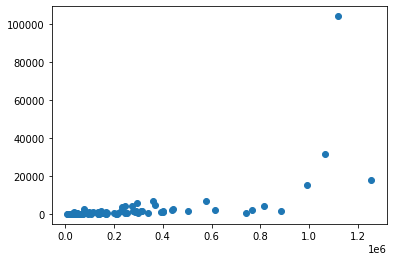

In [ ]:
populations = municipalities[:, 0]
cases = municipalities[:, 1]
plt.scatter(populations, cases)

The plot shows a dependency, but is not particularly clear and hard to analyse. This is because there are many municipalities with small populations, and a few with very large ones. In this cases, stretching the axis for small numbers and compressing for large ones helps, and $log$ will help us.

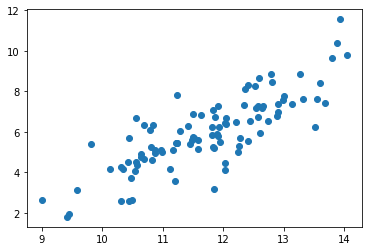

In [ ]:
plt.scatter(numpy.log(populations), numpy.log(cases))

There is obviously a dependency of number of cases on the population, but is it linear? We want to plot $\frac {cases} {populations}$ and see whether it exhibits a _trend_. On $\log$ scale, this will be difference $\log(cases) - \log(population)$.

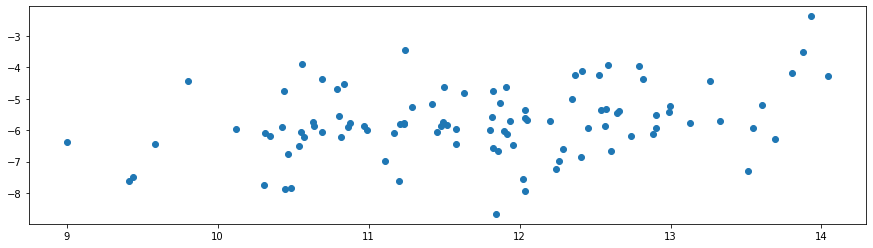

In [ ]:
plt.figure(figsize=(15, 4))
plt.scatter(numpy.log(populations), numpy.log(cases) - numpy.log(populations))

We can see that, though not strong, the dependency is there --- bigger municipalities have a higher density of the disease. On the natural scale, this would be much harder to see:

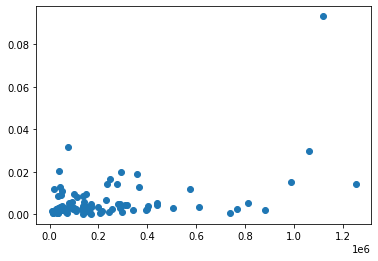

In [ ]:
plt.scatter(populations, cases/populations)